# 305 Batch Train

View more, visit my tutorial page: https://mofanpy.com/tutorials/
My Youtube Channel: https://www.youtube.com/user/MorvanZhou

Dependencies:
* torch: 0.1.11

In [1]:
import torch
import torch.utils.data as Data

torch.manual_seed(1)    # reproducible

In [2]:
BATCH_SIZE = 5
# BATCH_SIZE = 8

In [14]:
x = torch.linspace(1, 10, 10)       # this is x data (torch tensor)
y = torch.linspace(10, 1, 10)       # this is y data (torch tensor)

x = torch.unsqueeze(x, dim=1)
y = torch.unsqueeze(y, dim=1)

print("x: ", x)
print("y: ", y)

x:  tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.]])
y:  tensor([[10.],
        [ 9.],
        [ 8.],
        [ 7.],
        [ 6.],
        [ 5.],
        [ 4.],
        [ 3.],
        [ 2.],
        [ 1.]])


In [15]:
# torch_dataset = Data.TensorDataset(data_tensor=x, target_tensor=y)
# loader = Data.DataLoader(
#     dataset=torch_dataset,      # torch TensorDataset format
#     batch_size=BATCH_SIZE,      # mini batch size
#     shuffle=True,               # random shuffle for training
#     num_workers=2,              # subprocesses for loading data
# )

torch_dataset = Data.TensorDataset(x, y)
loader = Data.DataLoader(
    dataset=torch_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

In [16]:
for epoch in range(3):   # train entire dataset 3 times
    for step, (batch_x, batch_y) in enumerate(loader):  # for each training step
        # train your data...
        print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
              batch_x.numpy(), '| batch y: ', batch_y.numpy())


Epoch:  0 | Step:  0 | batch x:  [[ 2.]
 [ 7.]
 [ 3.]
 [ 8.]
 [ 5.]
 [ 4.]
 [10.]
 [ 1.]] | batch y:  [[ 9.]
 [ 4.]
 [ 8.]
 [ 3.]
 [ 6.]
 [ 7.]
 [ 1.]
 [10.]]
Epoch:  0 | Step:  1 | batch x:  [[6.]
 [9.]] | batch y:  [[5.]
 [2.]]
Epoch:  1 | Step:  0 | batch x:  [[ 4.]
 [ 7.]
 [ 6.]
 [ 1.]
 [ 2.]
 [ 5.]
 [ 9.]
 [10.]] | batch y:  [[ 7.]
 [ 4.]
 [ 5.]
 [10.]
 [ 9.]
 [ 6.]
 [ 2.]
 [ 1.]]
Epoch:  1 | Step:  1 | batch x:  [[8.]
 [3.]] | batch y:  [[3.]
 [8.]]
Epoch:  2 | Step:  0 | batch x:  [[ 6.]
 [ 7.]
 [ 3.]
 [ 4.]
 [10.]
 [ 9.]
 [ 8.]
 [ 1.]] | batch y:  [[ 5.]
 [ 4.]
 [ 8.]
 [ 7.]
 [ 1.]
 [ 2.]
 [ 3.]
 [10.]]
Epoch:  2 | Step:  1 | batch x:  [[2.]
 [5.]] | batch y:  [[9.]
 [6.]]


### Suppose a different batch size that cannot be fully divided by the number of data entreis:

In [17]:
# BATCH_SIZE = 8
# loader = Data.DataLoader(
#     dataset=torch_dataset,      # torch TensorDataset format
#     batch_size=BATCH_SIZE,      # mini batch size
#     shuffle=True,               # random shuffle for training
#     num_workers=2,              # subprocesses for loading data
# )
# for epoch in range(3):   # train entire dataset 3 times
#     for step, (batch_x, batch_y) in enumerate(loader):  # for each training step
#         # train your data...
#         print('Epoch: ', epoch, '| Step: ', step, '| batch x: ',
#               batch_x.numpy(), '| batch y: ', batch_y.numpy())

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [ ]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)       # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=1, bias=True)
)


In [ ]:
net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)  # optimize all nn parameters

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (out): Linear(in_features=10, out_features=1, bias=True)
)


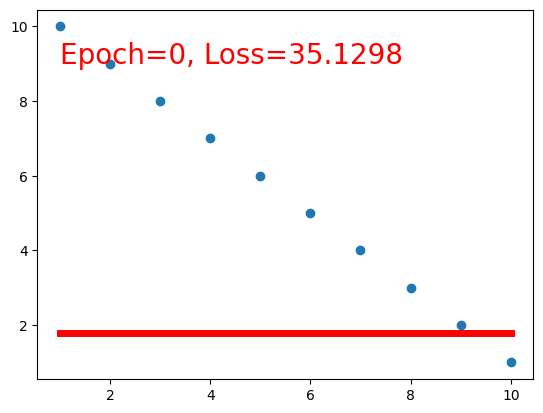

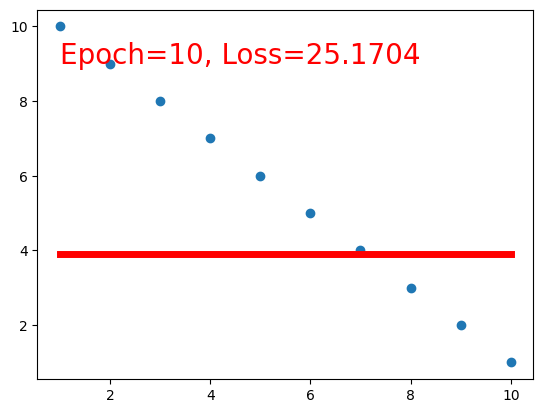

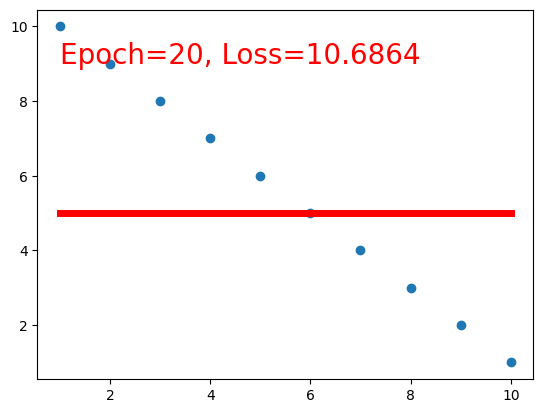

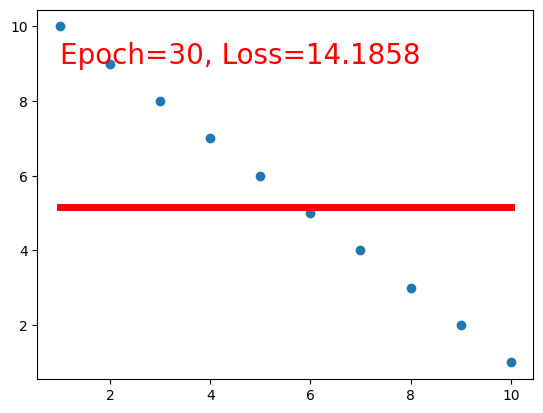

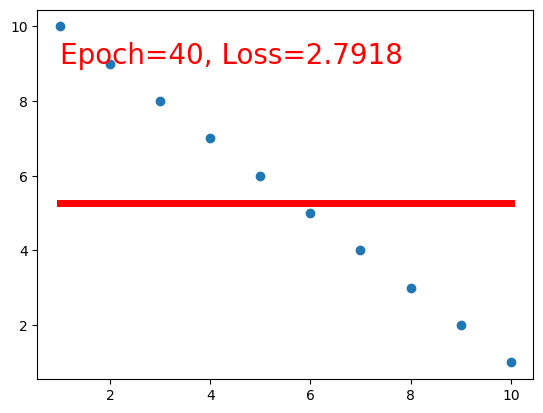

In [ ]:
plt.ion()   # something about plotting
for epoch in range(50):
    for step, (batch_x, batch_y) in enumerate(loader):
        predict = net(batch_x)
        loss = loss_func(predict, batch_y)      # compute loss
        optimizer.zero_grad()               # clear gradients for next training
        loss.backward()                     # backpropagation, compute gradients
        optimizer.step()

    with torch.no_grad():
        full_predict = net(x)

    if epoch % 10 == 0:
        plt.cla()
        plt.scatter(x.numpy(), y.numpy())
        plt.plot(x.numpy(), full_predict.numpy(), 'r-', lw=5)
        plt.text(1, 9, f'Epoch={epoch}, Loss={loss.item():.4f}',
                fontdict={'size':20, 'color':'red'})
        plt.pause(0.1)
plt.ioff()